# Random Forest Classifier

In [23]:
import os
os.chdir('C:/Sereda/Lectures/Springboard/Capstone2_CustomerChurn/')
import pandas as pd
import numpy as np
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score#, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 600)

In [3]:
df = pd.read_csv('data/df.csv')
df.head()

,is_churn,city_0.0,city_1.0,city_3.0,city_4.0,city_5.0,city_6.0,city_7.0,city_8.0,city_9.0,...,discount_30.0,discount_120.0,discount_149.0,registration_weekday_0.0,registration_weekday_1.0,registration_weekday_2.0,registration_weekday_3.0,registration_weekday_4.0,registration_weekday_5.0,registration_weekday_6.0
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
X = df.drop('is_churn', axis=1) # drop unknown churn
y = df[['is_churn']]
y = np.ravel(y)
y[:5]

array([0., 0., 1., 0., 0.])

#### Train-Test split
Taking 70% for training set and 30% for test set.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Train samples:",y_train.shape[0])
print("Test samples:",y_test.shape[0])

Train samples: 2324
Test samples: 996


In [10]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
model.score(X_test, y_test)

0.8875502008032129

#### Trial run with Cross-Validation
A more reliable way of validating the model and optimizing its parameters is by cross-validation.

In [13]:
print("Example of cross-validation:")
rf_cv = RandomForestClassifier(random_state=0)
scores = cross_val_score(rf_cv, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores.min(), scores.mean(), scores.max()

Example of cross-validation:
Cross-Validation Accuracy Scores [0.92274678 0.88841202 0.87553648 0.8583691  0.88362069 0.89655172
 0.87931034 0.90086207 0.91810345 0.90517241]


(0.8583690987124464, 0.8928685067337575, 0.9227467811158798)

In [17]:
rf_cv.fit(X_train, y_train)
confusion_matrix(y_test, rf_cv.predict(X_test))

array([[806,  47],
       [ 65,  78]], dtype=int64)

In [18]:
?RandomForestClassifier

In [19]:
rf_cv = RandomForestClassifier(criterion='entropy', random_state=0)
scores = cross_val_score(rf_cv, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.91845494 0.87982833 0.87982833 0.8583691  0.88793103 0.90086207
 0.87931034 0.89224138 0.91810345 0.90517241]


(0.8583690987124464, 0.8920101376350452, 0.9184549356223176)

#### GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'n_estimators': [10,20,50,100,200], 'max_features': ['auto', 'sqrt', 'log2', 0.5],\
              'criterion': ['gini', 'entropy']}
gs = GridSearchCV(estimator=model, param_grid = param_grid, scoring = 'recall', n_jobs=-1)
gs.fit(X_train, y_train)
print('Best model: ', gs.best_estimator_)
y_pred = gs.best_estimator_.predict(X_test)
print('Accuracy =',gs.best_estimator_.score(X_test, y_test))
print('Recall =',recall_score(y_test, y_pred))

Best model:  RandomForestClassifier(max_features=0.5, random_state=0)
Accuracy = 0.8825301204819277
Recall = 0.5594405594405595


In [ ]:
def confusion_matrix_plot(y_actual, y_predicted):
    '''Plot Binary Confusion Matrix for actual and predicted labels'''
    #from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_actual, y_predicted)
    tn = cm[0,0] # true negative count
    fp = cm[0,1] # false positive count
    fn = cm[1,0] # false negative count
    tp = cm[1,1] # true positive count
    print("[[TN, FP], [FN, TP]] =\n",cm) # print confusion matrix
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red') # counts
    plt.show();
    return tn,fp,fn,tp

[[TN, FP], [FN, TP]] =
 [[800  53]
 [ 60  83]]


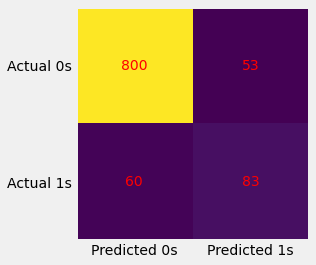

In [39]:
tn,fp,fn,tp = confusion_matrix_plot(y_test, y_pred)

In [52]:
param_grid = {'n_estimators': [10,20,50,100,200], 'max_features': ['auto', 'sqrt', 'log2', 0.5],\
              'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15]}
gs = GridSearchCV(estimator=model, param_grid = param_grid, scoring = 'recall', n_jobs=-1)
gs.fit(X_train, y_train)
print('Best model: ', gs.best_estimator_)
y_pred = gs.best_estimator_.predict(X_test)
print('Accuracy =',gs.best_estimator_.score(X_test, y_test))
print('Recall =',recall_score(y_test, y_pred))

Best model:  RandomForestClassifier(max_depth=15, max_features=0.5, n_estimators=50,
                       random_state=0)
Accuracy = 0.891566265060241
Recall = 0.5734265734265734


[[TN, FP], [FN, TP]] =
 [[806  47]
 [ 61  82]]


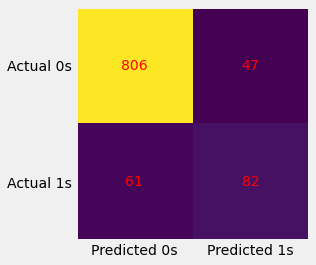

In [51]:
tn,fp,fn,tp = confusion_matrix_plot(y_test, y_pred)

In [55]:
#scoring = 'roc_auc'
param_grid = {'n_estimators': [10,20,50,100,200], 'max_features': ['auto', 'sqrt', 'log2', 0.5],\
              'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15]}
gs = GridSearchCV(estimator=model, param_grid = param_grid, scoring = 'roc_auc', n_jobs=-1)
gs.fit(X_train, y_train)
print('Best model: ', gs.best_estimator_)
y_pred = gs.best_estimator_.predict(X_test)
print('Accuracy =',gs.best_estimator_.score(X_test, y_test))
print('Recall =',recall_score(y_test, y_pred))

Best model:  RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       n_estimators=50, random_state=0)
Accuracy = 0.893574297188755
Recall = 0.5524475524475524


#### ROC-AUC

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

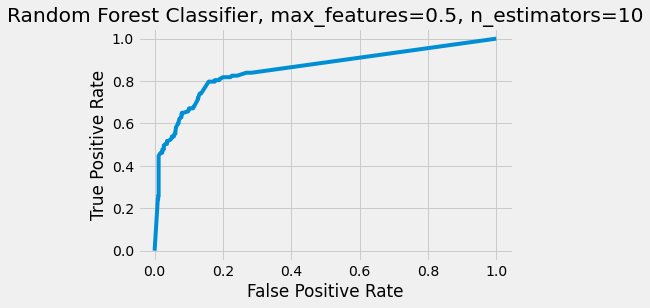

In [47]:
prob_y = gs.best_estimator_.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(y_test, prob_y, pos_label=1, drop_intermediate=False)
plt.plot(fpr, tpr, linestyle='-', label='Random Forest')
plt.title('Random Forest Classifier: max_features=0.5, n_estimators=10')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.legend() # show the legend
plt.show()

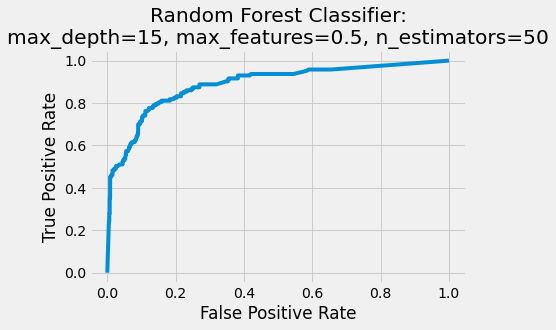

In [54]:
prob_y = gs.best_estimator_.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(y_test, prob_y, pos_label=1, drop_intermediate=False)
plt.plot(fpr, tpr, linestyle='-', label='Random Forest')
plt.title('Random Forest Classifier:\nmax_depth=15, max_features=0.5, n_estimators=50')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.legend() # show the legend
plt.show()

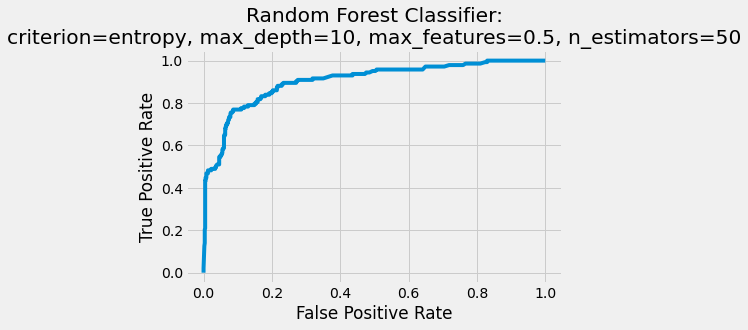

In [57]:
prob_y = gs.best_estimator_.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(y_test, prob_y, pos_label=1, drop_intermediate=False)
plt.plot(fpr, tpr, linestyle='-', label='Random Forest')
plt.title('Random Forest Classifier:\ncriterion=entropy, max_depth=10, max_features=0.5, n_estimators=50')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.legend() # show the legend
plt.show()

### Precision-Recall Curve

In [59]:
from sklearn.metrics import precision_recall_curve, auc
import seaborn as sns

C:\Programs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Programs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AUC: 0.708


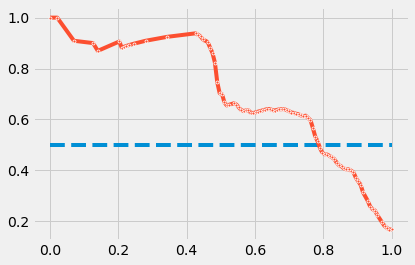

In [60]:
precision, recall, thresholds = precision_recall_curve(y_test, prob_y)
pr_auc_score = auc(recall, precision)
sns.lineplot([0, 1], [0.5, 0.5], linestyle='--')
plt = sns.lineplot(recall, precision, marker='.')
print('AUC: %.3f' % pr_auc_score)